In [2]:
# Data manipulation
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Utilities
import datetime as dt

Data

In [3]:
products_df = pd.read_csv('../../Data/external/products.csv')
sellers_df = pd.read_csv('../../Data/external/sellers.csv')
order_items_df = pd.read_csv('../../Data/external/order_items.csv')

1. Data Cleaning

In [4]:
# Get the count of non-null entries for each column and data type
print(products_df.info())
print(sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  -----

In [5]:
# Summary count of missing values in each column:
print("Missing values in each column: \n")
print(products_df.isna().sum())
# Check Empty Strings
print("\n Empty strings: \n")
empty_strings = (products_df == '') | (products_df == ' ')
print(empty_strings.sum())


Missing values in each column: 

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

 Empty strings: 

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [6]:
# Correct the column names in your fillna operation
for column in ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    # Calculate the median for each column and use it to fill missing values
    median_value = products_df[column].median()
    products_df[column] = products_df[column].fillna(median_value)


In [7]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [8]:
cleaned_df = products_df.dropna(subset=['product_category_name'])
threshold_length = 50
cleaned_df_products= products_df[products_df['product_category_name'].str.len() <= threshold_length]

In [9]:
# Count occurrences of each value in the product_category_name column
value_counts = cleaned_df_products['product_photos_qty'].value_counts()
print(value_counts)


product_photos_qty
1.0     16489
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
11.0       46
12.0       35
13.0        9
15.0        8
17.0        7
14.0        5
18.0        2
20.0        1
19.0        1
Name: count, dtype: int64


In [10]:
print(cleaned_df)

                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product

2. Check Sellers Data 

In [11]:
# Check for null values
null_values = sellers_df.isnull().sum()
print("Null values in each column:")
print(null_values)

# Check for empty strings in string-type columns
empty_strings = (sellers_df == '') | (sellers_df == ' ')
empty_strings_count = empty_strings.sum()
print("\nEmpty strings in each column:")
print(empty_strings_count)


Null values in each column:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Empty strings in each column:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [12]:
# Merge orders data with sellers data using seller_id as the key
merged_sellers_order = pd.merge(order_items_df, sellers_df, on='seller_id', how='inner')
print(merged_sellers_order.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  seller_zip_code_prefix  \
0  2017-09-19 09:45:35   58.90          13.29                   27277   
1  2017-05-03 11:05:13  239.90          19.93                    3471   
2  2018-01-18 14:

In [13]:
# Calculate turnover for each seller
seller_turnover = order_items_df.groupby('seller_id')['price'].sum().reset_index()
seller_turnover.rename(columns={'price': 'turnover'}, inplace=True)
print(seller_turnover.head(10))


                          seller_id  turnover
0  0015a82c2db000af6aaaf3ae2ecb0532   2685.00
1  001cca7ae9ae17fb1caed9dfb1094831  25080.03
2  001e6ad469a905060d959994f1b41e4f    250.00
3  002100f778ceb8431b7a1020ff7ab48f   1234.50
4  003554e2dce176b5555353e4f3555ac8    120.00
5  004c9cd9d87a3c30c522c48c4fc07416  19712.71
6  00720abe85ba0859807595bbf045a33b   1007.50
7  00ab3eff1b5192e5f1a63bcecfee11c8     98.00
8  00d8b143d12632bad99c0ad66ad52825     86.00
9  00ee68308b45bc5e2660cd833c3f81cc  20260.00


In [14]:
# Find sellers with the biggest turnover
biggest_turnover_sellers = seller_turnover.nlargest(5, 'turnover')

# Find sellers with the smallest turnover
smallest_turnover_sellers = seller_turnover.nsmallest(5, 'turnover')
print(biggest_turnover_sellers)
print(smallest_turnover_sellers)

                             seller_id   turnover
857   4869f7a5dfa277a7dca6462dcf3b52b2  229472.63
1013  53243585a1d6dc2643021fd1853d8905  222776.05
881   4a3ca9315b744ce9f8e9374361493884  200472.92
3024  fa1c13f2614d7b5c4749cbc52fecda94  194042.03
1535  7c67e1448b00f6e969d365cea6b010ab  187923.89
                             seller_id  turnover
2519  cf6f6bc4df3999b9c6440f124fb2f687       3.5
1465  77128dec4bec4878c37ab7d6169d6f26       6.5
373   1fa2d3def6adfa70e58c276bb64fe5bb       6.9
1370  702835e4b785b67a084280efca355756       7.6
627   34aefe746cd81b7f3b23253ea28bef39       8.0


In [15]:
# Export sellers with the biggest turnover to CSV
biggest_turnover_sellers.to_csv('../../Data/processed/biggest_turnover_sellers.csv', index=False)

# Export sellers with the smallest turnover to CSV
smallest_turnover_sellers.to_csv('../../Data/processed/smallest_turnover_sellers.csv', index=False)


In [16]:
# Group orders by area and calculate total sales for each area
area_sales = merged_sellers_order.groupby('seller_state')['price'].sum().reset_index()

# Find leaders and outsiders in sales in each area
area_sales_sorted = area_sales.sort_values(by='price', ascending=False)
leaders_in_sales = area_sales_sorted.head(5)  # the number as needed ( 5 biggest sales)
outsiders_in_sales = area_sales_sorted.tail(5)  # the number as needed ( 5 smallest sales)
# export the data to csv
leaders_in_sales.to_csv('../../Data/processed/leaders_in_sales.csv', index=False)
outsiders_in_sales.to_csv('../../Data/processed/outsiders_in_sales.csv', index=False)

display(leaders_in_sales)
display(outsiders_in_sales)


,seller_state,price
22,SP,8753396.21
15,PR,1261887.21
8,MG,1011564.74
16,RJ,843984.22
20,SC,632426.07


,seller_state,price
14,PI,2522.0
21,SE,1606.2
11,PA,1238.0
1,AM,1177.0
0,AC,267.0


In [17]:
merged_products_sellers = pd.merge(cleaned_df_products, order_items_df, on='product_id', how='inner')

most_products_sells = merged_products_sellers.groupby('price')['product_category_name'].sum().reset_index()
area_sales_sorted = area_sales.sort_values(by='price', ascending=False)

display(most_products_sells.head(10))
# Display the number of non-null values in each column
# Display the frequency of each value in 'product_category_name'
print(most_products_sells['product_category_name'].value_counts())



,price,product_category_name
0,0.85,construcao_ferramentas_construcaoconstrucao_fe...
1,1.20,beleza_saudebeleza_saudebeleza_saudebeleza_sau...
2,2.20,beleza_saude
3,2.29,papelaria
4,2.90,pet_shop
5,2.99,papelaria
6,3.06,utilidades_domesticasutilidades_domesticasutil...
7,3.49,automotivoautomotivoautomotivo
8,3.50,artesautomotivoautomotivoautomotivoautomotivoa...
9,3.54,bebes


product_category_name
beleza_saude                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           223
utilidades_domesticas                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [18]:
# Merge products data with orders data using product_id
merged_products_orders = pd.merge(order_items_df, cleaned_df_products, on='product_id', how='inner')

# Group by product category and calculate total sales
category_sales = merged_products_orders.groupby('product_category_name')['price'].sum().reset_index()

# Rename the columns for better understanding
category_sales.columns = ['product_category_name', 'total_sales']

# Sort the categories by total sales in descending order
category_sales = category_sales.sort_values(by='total_sales', ascending=False)

# Display the top categories
print(category_sales.head())
category_sales.to_csv('../../Data/processed/category_sales.csv', index=False)

     product_category_name  total_sales
11            beleza_saude   1258681.34
66      relogios_presentes   1205005.68
13         cama_mesa_banho   1036988.68
32           esporte_lazer    988048.97
44  informatica_acessorios    911954.32


Correlation between turnover and product weight: 0.12410705273595904
Correlation between price and product weight: 0.33981677002732036


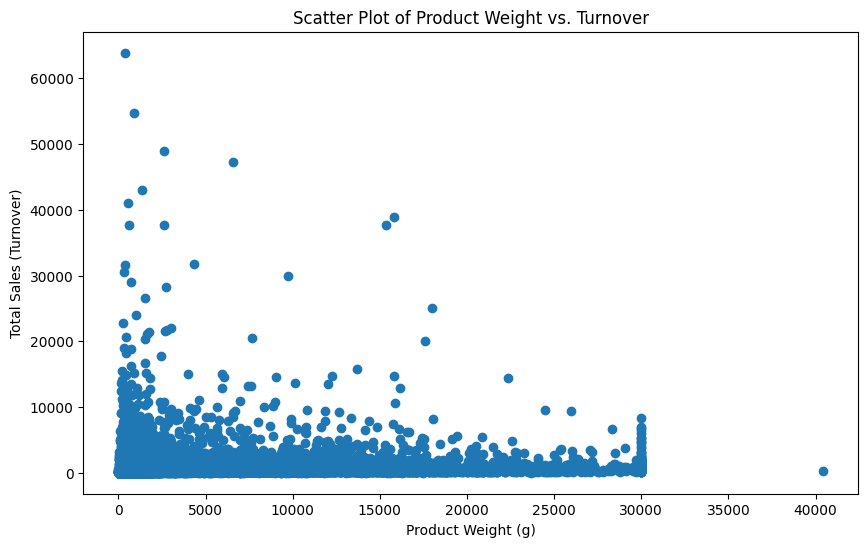

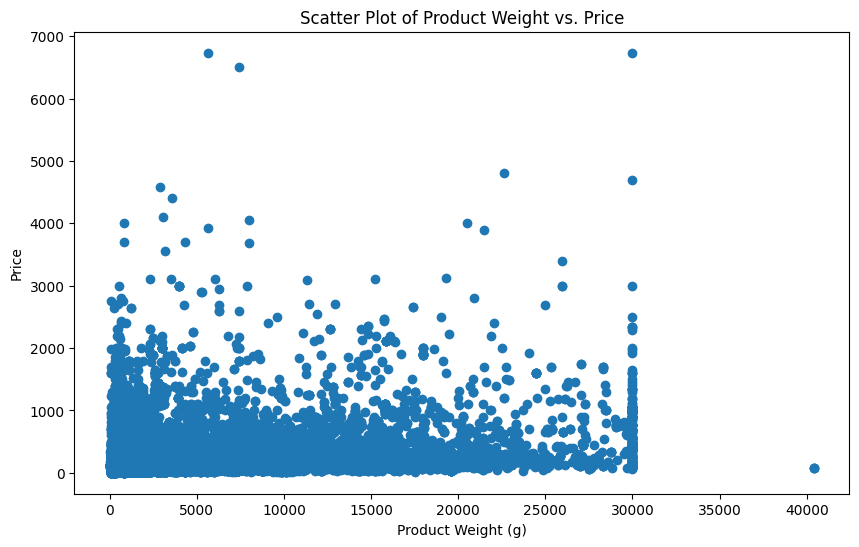

,product_id,total_sales,product_weight_g
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,300.0
1,00088930e925c41fd95ebfe695fd2655,129.90,1225.0
2,0009406fd7479715e4bef61dd91f2462,229.00,300.0
3,000b8f95fcb9e0096488278317764d19,117.80,550.0
4,000d9be29b5207b54e86aa1b1ac54872,199.00,250.0


In [19]:
# Merging order_items_df with cleaned_df_products using product_id
merged_df = pd.merge(order_items_df, cleaned_df_products, on='product_id', how='inner')

# Calculate total sales (turnover) for each product
product_sales = merged_df.groupby('product_id')['price'].sum().reset_index()
product_sales.columns = ['product_id', 'total_sales']

# Merge the total sales back with the product data
product_sales = pd.merge(product_sales, cleaned_df_products[['product_id', 'product_weight_g']], on='product_id', how='inner')

# Calculate correlation coefficients
correlation_turnover_weight = product_sales['total_sales'].corr(product_sales['product_weight_g'])
correlation_price_weight = merged_df['price'].corr(merged_df['product_weight_g'])

print(f"Correlation between turnover and product weight: {correlation_turnover_weight}")
print(f"Correlation between price and product weight: {correlation_price_weight}")

# Scatter plot for turnover vs. product weight
plt.figure(figsize=(10, 6))
plt.scatter(product_sales['product_weight_g'], product_sales['total_sales'])
plt.title('Scatter Plot of Product Weight vs. Turnover')
plt.xlabel('Product Weight (g)')
plt.ylabel('Total Sales (Turnover)')
plt.show()

# Scatter plot for price vs. product weight
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['product_weight_g'], merged_df['price'])
plt.title('Scatter Plot of Product Weight vs. Price')
plt.xlabel('Product Weight (g)')
plt.ylabel('Price')
plt.show()
display(product_sales.head())

Segmentation of Sellers

In [20]:
# Calculate total sales per seller
seller_sales = merged_df.groupby('seller_id')['price'].sum().reset_index()
seller_sales.columns = ['seller_id', 'total_sales']
display(seller_sales.head())

,seller_id,total_sales
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03
2,001e6ad469a905060d959994f1b41e4f,250.00
3,002100f778ceb8431b7a1020ff7ab48f,1234.50
4,004c9cd9d87a3c30c522c48c4fc07416,17841.69


Segment Sellers Based on Sales

In [21]:
# Define quantiles for segmentation
quantiles = seller_sales['total_sales'].quantile([0.25, 0.5, 0.75])

# Function to segment sellers
def segment_seller(sales):
    if sales <= quantiles[0.25]:
        return 'Low'
    elif sales <= quantiles[0.5]:
        return 'Medium'
    elif sales <= quantiles[0.75]:
        return 'High'
    else:
        return 'Top'

# Apply the segmentation function
seller_sales['segment_sallers'] = seller_sales['total_sales'].apply(segment_seller)

# Display the segmented sellers
print(seller_sales.head())
seller_sales.to_csv('../../Data/processed/seller_sales.csv', index=False)

                          seller_id  total_sales segment_sallers
0  0015a82c2db000af6aaaf3ae2ecb0532      2685.00            High
1  001cca7ae9ae17fb1caed9dfb1094831     25080.03             Top
2  001e6ad469a905060d959994f1b41e4f       250.00          Medium
3  002100f778ceb8431b7a1020ff7ab48f      1234.50            High
4  004c9cd9d87a3c30c522c48c4fc07416     17841.69             Top


Segmentation of Products

In [22]:
# Define quantiles for segmentation
quantiles_product = product_sales['total_sales'].quantile([0.25, 0.5, 0.75])

# Function to segment products
def segment_product(sales):
    if sales <= quantiles_product[0.25]:
        return 'Low'
    elif sales <= quantiles_product[0.5]:
        return 'Medium'
    elif sales <= quantiles_product[0.75]:
        return 'High'
    else:
        return 'Top Turnover'

# Apply the segmentation function
product_sales['segment_turnover'] = product_sales['total_sales'].apply(segment_product)

# Display the segmented products
print(product_sales.head())
product_sales.to_csv('../../Data/processed/product_sales_segment.csv', index=False)

                         product_id  total_sales  product_weight_g  \
0  00066f42aeeb9f3007548bb9d3f33c38       101.65             300.0   
1  00088930e925c41fd95ebfe695fd2655       129.90            1225.0   
2  0009406fd7479715e4bef61dd91f2462       229.00             300.0   
3  000b8f95fcb9e0096488278317764d19       117.80             550.0   
4  000d9be29b5207b54e86aa1b1ac54872       199.00             250.0   

  segment_turnover  
0           Medium  
1           Medium  
2             High  
3           Medium  
4             High  


Task 3. Analysis of product semantics

In [23]:
# Load the dataset
reviews_df = pd.read_csv('../../Data/external/order_reviews.csv')

# Display the first few rows
print(reviews_df.head())

# Preprocess text data
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply preprocessing to the review_comment_message column
reviews_df['cleaned_review'] = reviews_df['review_comment_message'].apply(preprocess_text)

# Display the first few rows after preprocessing
print(reviews_df.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

Step 2: Sentiment Analysis


In [24]:
# Define a simple rule-based sentiment
def classify_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
reviews_df['sentiment'] = reviews_df['review_score'].apply(classify_sentiment)

# Display the sentiment distribution
print(reviews_df['sentiment'].value_counts())



sentiment
positive    76620
negative    15093
neutral      8287
Name: count, dtype: int64


Correlate Text Comments with Numerical Ratings

                 review_score  sentiment_score
review_score         1.000000         0.953103
sentiment_score      0.953103         1.000000


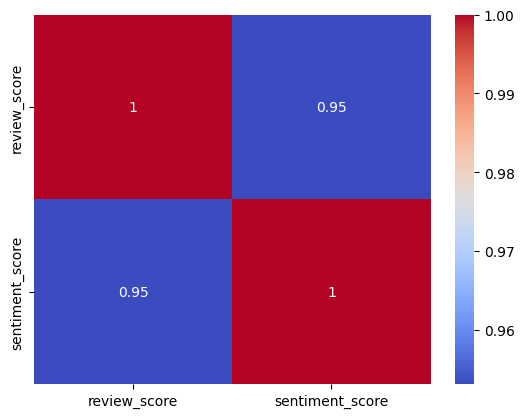

In [25]:
# Map sentiment to numerical values for correlation analysis
reviews_df['sentiment_score'] = reviews_df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Calculate correlation
correlation_value = reviews_df[['review_score', 'sentiment_score']].corr()
print(correlation_value)

# Visualize the correlation
sns.heatmap(correlation_value, annot=True, cmap='coolwarm')
plt.show()


In [26]:
# Load order_items and products data
order_items_df = order_items_df
products_df = cleaned_df_products

# Merge dataframes
merged_reviews = pd.merge(reviews_df, order_items_df, on='order_id')
merged_reviews = pd.merge(merged_reviews, products_df, on='product_id')

# Aggregate reviews by product
product_reviews = merged_reviews.groupby('product_id').agg({
    'review_score': ['mean', 'count'],
    'sentiment_score': 'mean'
}).reset_index()
product_reviews.columns = ['product_id', 'avg_rating', 'review_count', 'average_sentiment_score']

# Identify products with the best and worst reviews
best_products = product_reviews.sort_values(by='avg_rating', ascending=False).head(10)
worst_products = product_reviews.sort_values(by='avg_rating').head(10)

print("Best Products:")
print(best_products)

print("Worst Products:")
print(worst_products)

# Aggregate reviews by seller
seller_reviews = merged_reviews.groupby('seller_id').agg({
    'review_score': ['mean', 'count'],
    'sentiment_score': 'mean'
}).reset_index()
seller_reviews.columns = ['seller_id', 'avg_rating', 'review_count', 'average_sentiment_score']

# Identify sellers with only negative feedback
negative_feedback_sellers = seller_reviews[seller_reviews['average_sentiment_score'] == -1]

print("Sellers with only negative feedback:")
print(negative_feedback_sellers)
# export the data to csv
seller_reviews.to_csv('../../Data/processed/seller_reviews.csv', index=False)
best_products.to_csv('../../Data/processed/best_products.csv', index=False)
worst_products.to_csv('../../Data/processed/worst_products.csv', index=False)
product_reviews.to_csv('../../Data/processed/product_reviews.csv', index=False)
negative_feedback_sellers.to_csv('../../Data/processed/negative_feedback_sellers.csv', index=False)


Best Products:
                             product_id  avg_rating  review_count  \
0      00066f42aeeb9f3007548bb9d3f33c38         5.0             1   
12109  5f2ad53b751662e4c54dceffadb3804d         5.0             1   
24965  c5be1408598054572f31046ba67ee86e         5.0             1   
12089  5f043cb6ec3f7dcaddf80468c523a80d         5.0             1   
24958  c5ac6d71e1684e3e768495f047b33379         5.0             1   
12091  5f09b4a957ee45628820bf10056a1041         5.0             1   
12092  5f0a49e6e539d4e186eeddfd69db9863         5.0             2   
12095  5f12f6b1738fab26e4a9d7907452c932         5.0             1   
12096  5f141d2c6058727659960a250aa940f6         5.0             1   
24953  c59e6dced23214126ac972a4a4525e87         5.0             1   

       average_sentiment_score  
0                          1.0  
12109                      1.0  
24965                      1.0  
12089                      1.0  
24958                      1.0  
12091                      